# Audio

In [28]:
from utils.audio import loadWAV

filename = 'data/voxceleb1/id10001/1zcIwhmdeo4/00001.wav'
wav = loadWAV(filename, 200)

wav

Loading
Audio data/voxceleb1/id10001/1zcIwhmdeo4/00001.wav: 0.006000041961669922s


array([[ 7.02514648e-02,  7.02819824e-02,  9.15527344e-02, ...,
         9.72595215e-02,  7.17773438e-02,  5.20324707e-02],
       [ 4.11163330e-01,  2.95104980e-01,  2.07763672e-01, ...,
         4.05883789e-03,  5.77087402e-02,  1.08398438e-01],
       [ 3.64685059e-02,  2.33459473e-02,  3.47290039e-02, ...,
         1.33270264e-01,  1.44653320e-01,  5.93261719e-02],
       ...,
       [-6.87255859e-02, -4.30603027e-02, -3.33557129e-02, ...,
        -8.78906250e-03,  1.03759766e-03, -2.44140625e-04],
       [-5.85937500e-03,  1.70288086e-02, -5.97534180e-02, ...,
         3.57910156e-01,  2.86956787e-01,  2.48260498e-01],
       [ 1.08642578e-02,  5.15441895e-02, -5.64270020e-02, ...,
        -8.63037109e-02, -1.17065430e-01, -1.53686523e-01]])

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import librosa
import torch
from torchaudio import load
from torchaudio.transforms import Spectrogram

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

C:\Users\giang\anaconda3\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


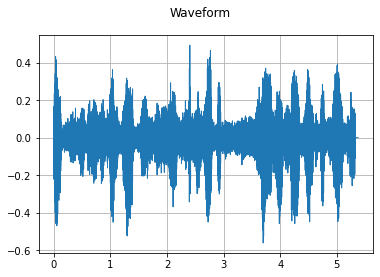

C:\Users\giang\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


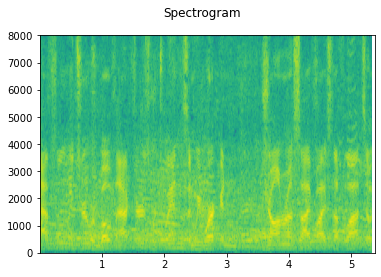

In [15]:
filename = 'data/voxceleb2/id00012/_raOc3-IRsw/00110.wav'
waveform, sample_rate = load(filename)

plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)

# Config

In [20]:
from utils.config import *

JSON = 'configs/pre_trained/AutoSpeech.json'
config = process_config(JSON)

[INFO]: Loading configuration and creating dirs.
[INFO]: Experiment: AutoSpeech Pretrained.
[INFO]: Experiment: AutoSpeech Pretrained.


# Dataset loader

In [2]:
from datasets.VoxCeleb2 import VoxCeleb2
import torch

train_dataset = VoxCeleb2(**vars(config))

train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=200,
            shuffle=False,
            num_workers=0,
            drop_last=False,
        )

In [21]:
from datasets.VoxCeleb1 import VoxCeleb1
import torch

test_dataset = VoxCeleb1(**vars(config))

test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=1,
            shuffle=False,
            num_workers=0,
            drop_last=False,
        )

In [3]:
from datasets.AutoSpeechTestset import AutoSpeechTestset
import torch

test_dataset = AutoSpeechTestset(**vars(config))

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    drop_last=False,
)


In [22]:
len(test_dataset)

37720

In [23]:
for ref, com, label in test_loader:
    break

In [24]:
ref.size()

torch.Size([1, 10, 48240])

In [10]:
com.size()

torch.Size([1, 41, 32, 257])

In [11]:
label

tensor([True])

In [16]:
data = ref.squeeze(0)
data.size()

torch.Size([34, 32, 257])

In [14]:
data = data.reshape(-1, data.size()[-1])
data.size()

torch.Size([1088, 257])

In [17]:
data = data.unsqueeze(1)
data.size()

torch.Size([34, 1, 32, 257])

# Preprocessing AutoSpeech

In [ ]:

compute_mean_std(merged_out_dir, args.dataset_root.joinpath('mean.npy'),
                 args.dataset_root.joinpath('std.npy'))
